In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Data = pd.read_csv("D:\\1_Lecture Material\\Term_2\\Pedram Habibi_Business_Processing\\Datasets\\SampData_DecisionTree.csv")

In [2]:
print(Data.head())

   age   workclass      education       marital-status        occupation  \
0   39   State-gov      Bachelors        Never-married      Adm-clerical   
1   22   State-gov   Some-college   Married-civ-spouse     Other-service   
2   41   State-gov      Assoc-voc   Married-civ-spouse      Craft-repair   
3   29   State-gov      Bachelors   Married-civ-spouse    Prof-specialty   
4   46   State-gov        Masters              Widowed   Protective-serv   

     relationship    race    sex  hours-per-week  native-country  Income  
0   Not-in-family   White   Male              40   United-States   <=50K  
1         Husband   Black   Male              15   United-States   <=50K  
2         Husband   White   Male              40   United-States   <=50K  
3         Husband   White   Male              50   United-States    >50K  
4       Unmarried   White   Male              40   United-States   <=50K  


In [3]:
perc =[.20, .40, .60, .80] 
include =['object', 'float', 'int'] 
print(Data.describe(percentiles = perc, include = include))
Data.describe()

       workclass education       marital-status     occupation relationship  \
count        467       467                  467            467          467   
unique         6        16                    7             13            6   
top      Private   HS-grad   Married-civ-spouse   Craft-repair      Husband   
freq         344       149                  216             65          180   

          race    sex  native-country  Income  
count      467    467             467     467  
unique       5      2              24       2  
top      White   Male   United-States   <=50K  
freq       391    313             423     362  


,age,hours-per-week
count,467.000000,467.000000
mean,37.841542,40.134904
std,12.980860,11.491226
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,46.000000,42.000000
max,90.000000,98.000000


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
print(list(Data.columns))
Data.race.unique()

['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', 'Income']


array([' White', ' Black', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [6]:
columns=['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
 'Income']
workclass = {' State-gov':1, ' Self-emp-not-inc':2, ' Self-emp-inc':3, ' Private':4,' Local-gov':5, ' Federal-gov':6} 
Data.workclass = [workclass[item] for item in Data.workclass] 
education={' Bachelors':1, ' Some-college':2, ' Assoc-voc':3, ' Masters':4,' HS-grad':5 , ' Doctorate':6, ' Assoc-acdm':7, ' 7th-8th':8, ' 11th':9,' 9th':10, ' Prof-school':11, ' 10th':12, ' 5th-6th':13, ' 12th':14, ' 1st-4th':15,' Preschool':16}
Data.education = [education[item] for item in Data.education] 
race = {' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Other':3,' Amer-Indian-Eskimo':4} 
Data.race = [race[item] for item in Data.race] 

In [7]:
#feature_cols = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country']
feature_cols = ['age','hours-per-week','workclass','education','race']
X = Data[feature_cols] # Features
y = Data.Income

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf=clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7375886524822695


In [11]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\Jigar_PAtel\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


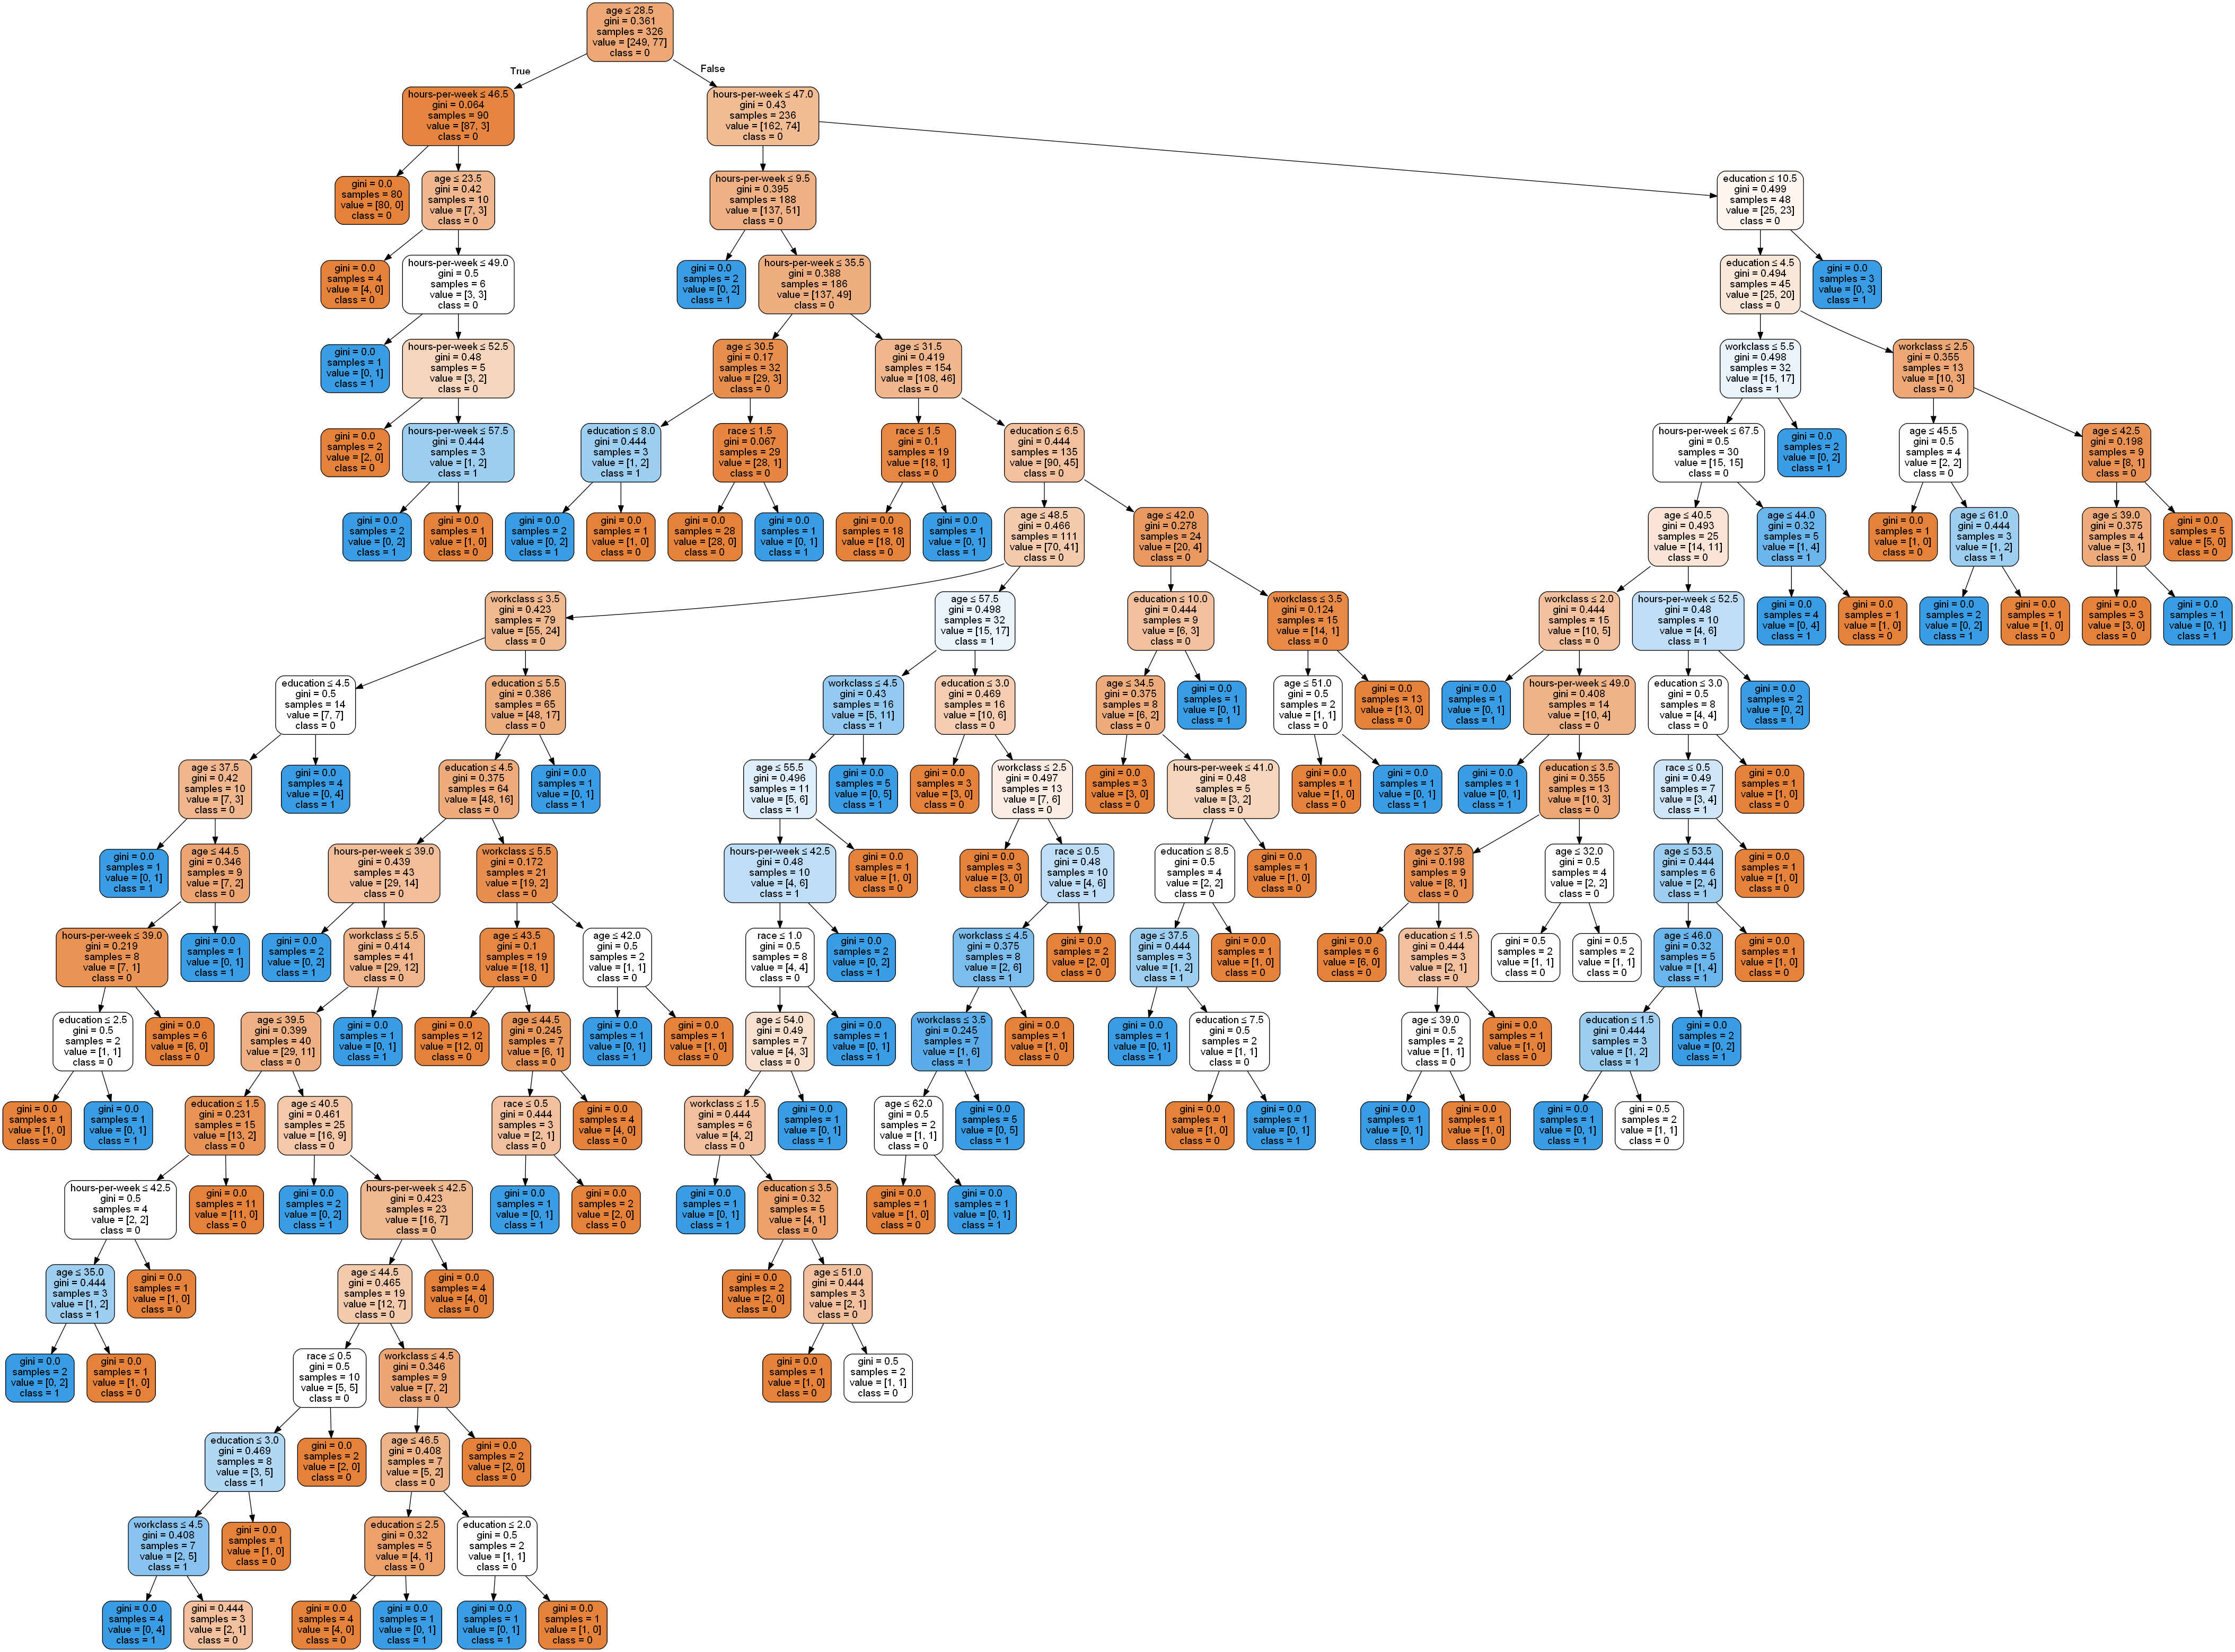

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')
Image(graph.create_png())

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.
